# Description
<p>In this project, you will practice techniques of Clustering under unsupervised machine learning using python with the Cambridge Crime Data dataset. The data contains a list of reported crimes in the annual crime report by the Cambridge police department from the year 2009 to 2016. The aim of the project is to divide the crimes into groups/clusters according to the crime type or crime column in the dataset and the neighborhood. The projects tests and strengths your understanding of the following previously discussed classes’ topics:</p>
<ul>
<li>K-Means Clustering.</li>
<li>Hierarchical Clustering.</li>
</ul>

# Import Libraireis

In [855]:

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import cm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# Read dataset

### Reading csv file

In [856]:
crime = pd.read_csv("Cambridge Crime Data 2009-2016.csv")
crime.head(5)

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA"
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA"
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg..."
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA"
4,2009-00006,01/01/2009 02:34:00 AM,01/01/2009 02:15 - 02:35,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA"


### check data set information

In [857]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56014 entries, 0 to 56013
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   File Number      56014 non-null  object 
 1   Date of Report   56014 non-null  object 
 2   Crime Date Time  56014 non-null  object 
 3   Crime            56014 non-null  object 
 4   Reporting Area   56012 non-null  float64
 5   Neighborhood     56012 non-null  object 
 6   Location         55931 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.0+ MB


### check unique values()

In [858]:
for col in crime.columns:
    print(crime[col].unique())

['2009-00002' '2009-00003' '2009-00004' ... '2016-07192' '2016-07194'
 '2016-07195']
['01/01/2009 12:39:00 AM' '01/01/2009 01:34:00 AM'
 '01/01/2009 01:43:00 AM' ... '09/30/2016 06:52:00 PM'
 '09/30/2016 07:52:00 PM' '09/30/2016 09:44:00 PM']
['1/1/09 0:39' '1/1/09 1:34' '01/01/2009 02:20 - 02:35' ...
 '09/16/2016 18:52 - 09/30/2016 18:52' '09/30/2016 19:51'
 '09/30/2016 21:43']
['Simple Assault' 'Aggravated Assault' 'Disorderly' 'Missing Person'
 'Mal. Dest. Property' 'Shoplifting' 'Hit and Run' 'Trespassing'
 'Larceny from MV' 'Larceny (Misc)' 'Housebreak' 'Larceny from Building'
 'Commercial Break' 'Larceny from Residence' 'Larceny from Person'
 'Street Robbery' 'Forgery' 'OUI' 'Domestic Dispute' 'Warrant Arrest'
 'Auto Theft' 'Accident' 'Larceny of Bicycle' 'Drugs' 'Threats'
 'Phone Calls' 'Larceny of Services' 'Violation of R.O.'
 'Commercial Robbery' 'Annoying & Accosting' 'Harassment'
 'Liquor Possession/Sale' 'Flim Flam' 'Peeping & Spying'
 'Indecent Exposure' 'Homicide' 'Larce

### Separate two date in 'Crime date time' if exist

In [859]:

def separate_date(x):
    y = x.split(' ')
    if len(y) == 2:
        return x
    if len(y) == 4:
        return [[y[0]+' '+ y[1]], [y[0] + ' ' + y[3]]]
    if len(y) == 5:
        return [[y[0] + ' ' + y[1]], [y[3] + ' ' + y[4]]]


crime['Crime Date Time'] = crime['Crime Date Time'].apply(lambda x: separate_date(x))
crime.isna().sum()

File Number         0
Date of Report      0
Crime Date Time    17
Crime               0
Reporting Area      2
Neighborhood        2
Location           83
dtype: int64

### drop null values

In [860]:
crime.dropna(inplace=True)
crime.isna().sum()

File Number        0
Date of Report     0
Crime Date Time    0
Crime              0
Reporting Area     0
Neighborhood       0
Location           0
dtype: int64

### create 'double' variable to record if 'Crime Date Time' has 1 or 2 date

In [861]:
crime['double'] = crime['Crime Date Time'].apply(lambda x: 0 if type(x[0]) == str else 1)
crime

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location,double
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA",0
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA",0
2,2009-00004,01/01/2009 01:43:00 AM,"[[01/01/2009 02:20], [01/01/2009 02:35]]",Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",1
3,2009-00005,01/01/2009 02:27:00 AM,"[[01/01/2009 02:20], [01/01/2009 02:45]]",Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA",1
4,2009-00006,01/01/2009 02:34:00 AM,"[[01/01/2009 02:15], [01/01/2009 02:35]]",Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA",1
...,...,...,...,...,...,...,...,...
56009,2016-07187,09/30/2016 04:05:00 PM,"[[09/28/2016 17:00], [09/28/2016 18:00]]",Larceny from Residence,510.0,Cambridgeport,"0 FAIRMONT AVE, Cambridge, MA",1
56010,2016-07189,09/30/2016 05:38:00 PM,"[[09/30/2016 16:30], [09/30/2016 17:38]]",Hit and Run,1105.0,North Cambridge,"2000 MASSACHUSETTS AVE, Cambridge, MA",1
56011,2016-07192,09/30/2016 06:52:00 PM,"[[09/16/2016 18:52], [09/30/2016 18:52]]",Harassment,702.0,Riverside,"0 Soden St, Cambridge, MA",1
56012,2016-07194,09/30/2016 07:52:00 PM,09/30/2016 19:51,Hit and Run,1002.0,West Cambridge,"University Rd & Mount Auburn St, Cambridge, MA",0


### create new row for each double date

In [863]:
#collect all rows having only single date
crime_simple = crime[crime['double'] == 0]

#collect all row having double date and assign only the first date
crime_double1 = crime[crime['double'] == 1]
crime_double1['Crime Date Time'] = crime_double1['Crime Date Time'].apply(lambda x: x[0][0])

#collect all row having double date and assign only the second date
crime_double2 = crime[crime['double'] == 1]
crime_double2['Crime Date Time'] = crime_double2['Crime Date Time'].apply(lambda x: x[1][0])

#concatenate all three dataframe above
crime = pd.concat([crime_simple, crime_double1, crime_double2], axis=0, ignore_index=True)
crime

C:\Users\mariah\AppData\Local\Temp\ipykernel_6020\2404509274.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_double1['Crime Date Time'] = crime_double1['Crime Date Time'].apply(lambda x: x[0][0])
C:\Users\mariah\AppData\Local\Temp\ipykernel_6020\2404509274.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_double2['Crime Date Time'] = crime_double2['Crime Date Time'].apply(lambda x: x[1][0])


,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location,double
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA",0
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA",0
2,2009-00007,01/01/2009 02:45:00 AM,1/1/09 2:45,Missing Person,507.0,Cambridgeport,"0 WOODROW WILSON COURT, Cambridge, MA",0
3,2009-00008,01/01/2009 02:37:00 AM,1/1/09 2:37,Mal. Dest. Property,1108.0,North Cambridge,"100 MONTGOMERY STREET, Cambridge, MA",0
4,2009-00012,01/01/2009 12:43:00 PM,1/1/09 14:05,Trespassing,501.0,Cambridgeport,"600 Massachusetts Avenue, Cambridge, MA",0
...,...,...,...,...,...,...,...,...
89642,2016-07185,09/30/2016 03:21:00 PM,09/30/2016 15:20,Shoplifting,701.0,Riverside,"0 CENTRAL SQ, Cambridge, MA",1
89643,2016-07186,09/30/2016 03:52:00 PM,09/30/2016 11:15,Mal. Dest. Property,1303.0,Strawberry Hill,"700 HURON AVE, Cambridge, MA",1
89644,2016-07187,09/30/2016 04:05:00 PM,09/28/2016 18:00,Larceny from Residence,510.0,Cambridgeport,"0 FAIRMONT AVE, Cambridge, MA",1
89645,2016-07189,09/30/2016 05:38:00 PM,09/30/2016 17:38,Hit and Run,1105.0,North Cambridge,"2000 MASSACHUSETTS AVE, Cambridge, MA",1


### create new features related to date time

In [864]:
crime['year'] = pd.to_datetime(crime['Crime Date Time']).dt.year
crime['month'] = pd.to_datetime(crime['Crime Date Time']).dt.month
crime['day'] = pd.to_datetime(crime['Crime Date Time']).dt.day_of_week
crime['weekend'] = crime['day'].apply(lambda x: 1 if (x==5 or x==6) else 0)
crime['hour'] = pd.to_datetime(crime['Crime Date Time']).dt.hour
crime.drop(['File Number','Date of Report', 'Crime Date Time', 'double', 'Location'], axis=1, inplace=True)
crime 


C:\Users\mariah\AppData\Local\Temp\ipykernel_6020\73342760.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime['year'] = pd.to_datetime(crime['Crime Date Time']).dt.year
C:\Users\mariah\AppData\Local\Temp\ipykernel_6020\73342760.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime['month'] = pd.to_datetime(crime['Crime Date Time']).dt.month
C:\Users\mariah\AppData\Local\Temp\ipykernel_6020\73342760.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime['day'] = pd.to_datetime(crime['Crime Date Time']).dt.day_of_week
C:\Users\mariah\AppData\Local\Temp\ipykernel

,Crime,Reporting Area,Neighborhood,year,month,day,weekend,hour
0,Simple Assault,504.0,Cambridgeport,2009,1,3,0,0
1,Simple Assault,610.0,Mid-Cambridge,2009,1,3,0,1
2,Missing Person,507.0,Cambridgeport,2009,1,3,0,2
3,Mal. Dest. Property,1108.0,North Cambridge,2009,1,3,0,2
4,Trespassing,501.0,Cambridgeport,2009,1,3,0,14
...,...,...,...,...,...,...,...,...
89642,Shoplifting,701.0,Riverside,2016,9,4,0,15
89643,Mal. Dest. Property,1303.0,Strawberry Hill,2016,9,4,0,11
89644,Larceny from Residence,510.0,Cambridgeport,2016,9,2,0,18
89645,Hit and Run,1105.0,North Cambridge,2016,9,4,0,17


In [ ]:
### diplay number of crimes for each year

In [865]:
print('Nombre of observations:\n')
for year in np.sort(crime.year.unique()):
    print(f'{year}: {len(crime[crime['year']==year])}')

Nombre of observations:

1940: 1
1951: 2
1970: 2
1980: 4
1982: 1
1993: 2
1995: 1
1999: 2
2000: 7
2001: 20
2002: 7
2003: 3
2004: 18
2005: 10
2006: 23
2007: 29
2008: 179
2009: 12957
2010: 12822
2011: 12126
2012: 10956
2013: 10627
2014: 11102
2015: 11051
2016: 7695


### filter dataset form 2009

In [ ]:
crime = crime[crime['year'] >= 2009]

print('Nombre of observations:\n')
for year in np.sort(crime.year.unique()):
    print(f'{year}: {len(crime[crime['year']==year])}')


Nombre of observations:

2009: 12957
2010: 12822
2011: 12126
2012: 10956
2013: 10627
2014: 11102
2015: 11051
2016: 7695


### Select feature and encoding categorical variables

In [ ]:
# we will use only 'Reporting Area', 'Neighborhood', 'Crime'
X = crime[['Reporting Area', 'Neighborhood', 'Crime']]

#X['year'] = OrdinalEncoder().fit_transform(X[['year']])

for col in X.columns:
    X[col] = LabelEncoder().fit_transform(X[col])
X



C:\Users\mariah\AppData\Local\Temp\ipykernel_6020\3172232903.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = LabelEncoder().fit_transform(X[col])
C:\Users\mariah\AppData\Local\Temp\ipykernel_6020\3172232903.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = LabelEncoder().fit_transform(X[col])
C:\Users\mariah\AppData\Local\Temp\ipykernel_6020\3172232903.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,Reporting Area,Neighborhood,Crime
0,33,2,43
1,49,7,43
2,36,2,34
3,103,8,33
4,30,2,49
...,...,...,...
89642,53,10,42
89643,115,11,33
89644,39,2,28
89645,100,8,19


### choosing optimal clusters

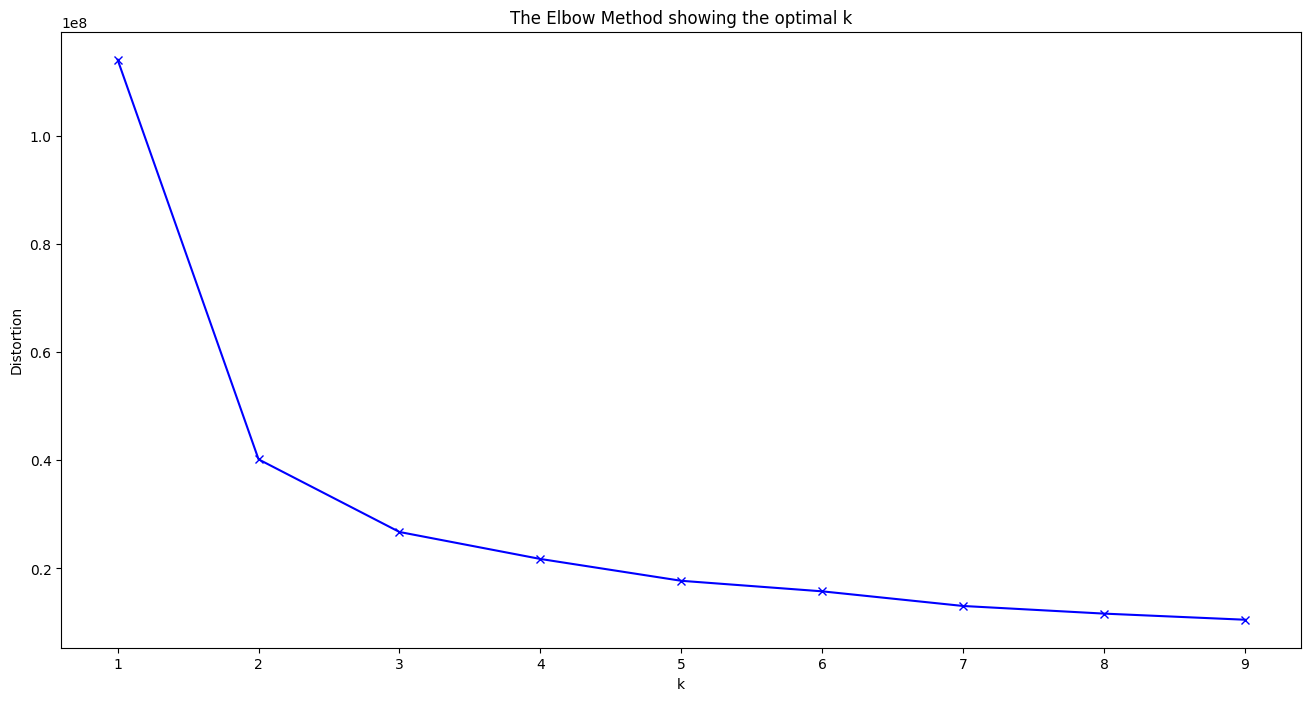

In [868]:
#Store different inertia values for different K:
distortions = []
K = range(1,10)
for k in K:
   kmeanModel = KMeans(n_clusters=k, random_state=0)
   kmeanModel.fit(X)
   distortions.append(kmeanModel.inertia_)

#Plot Distortions Vs Values of K:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Kmeans model

### fit the model using result from elbow graph

In [ ]:
#according the elbow graph
n_clusters = 2

#initialize the model
model = KMeans(n_clusters = n_clusters, random_state=0)

#train the model with X
model.fit(X)

#pridict cluster of features
clusters = model.predict(X)
clusters

array([1, 1, 1, ..., 1, 0, 0], shape=(89336,), dtype=int32)

### plot clusters in 2-D for each couple of variables

C:\Users\mariah\AppData\Local\Temp\ipykernel_6020\462752076.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X.iloc[clusters == j, i], X.iloc[clusters ==j, k], c = colors[j])


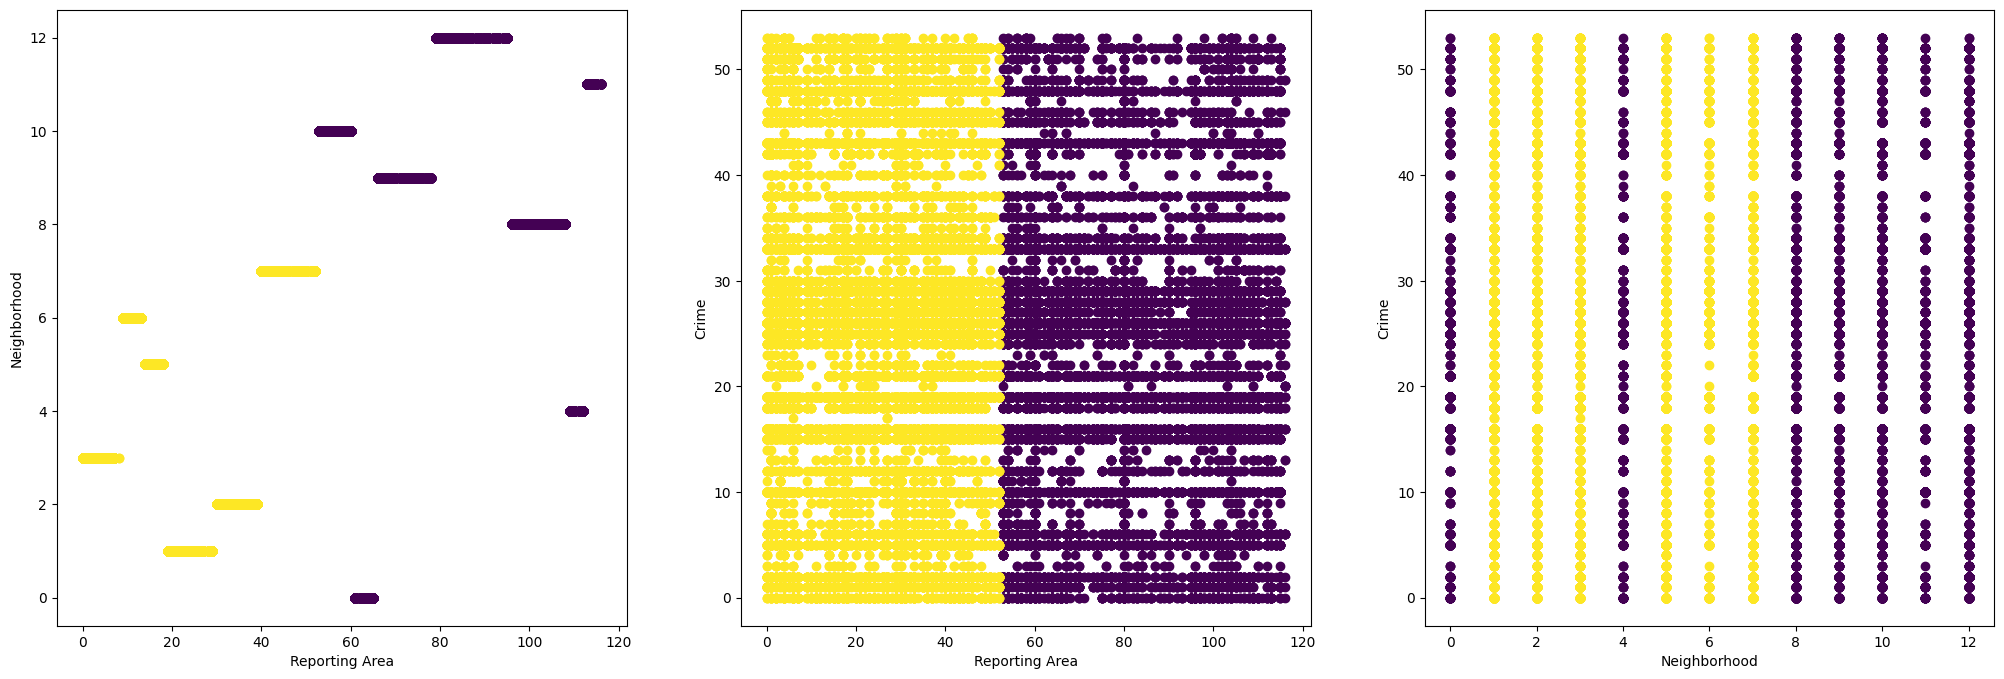

In [870]:
#use color map for each cluster
colors = cm.viridis(np.linspace(0, 1, n_clusters))

columns = ['Reporting Area', 'Neighborhood', 'Crime']
import math
plt.subplots(math.comb(len(columns), 2)//3,3, figsize=(25,8))
m = 1
#plot clusters for each column i and j of the data

for i in range(len(columns)-1):
    for k in range(i+1, len(columns)):
        plt.subplot(math.comb(len(columns), 2)//3,3, m)
        for j in range(n_clusters):
            plt.scatter(X.iloc[clusters == j, i], X.iloc[clusters ==j, k], c = colors[j])
            plt.xlabel(columns[i])
            plt.ylabel(columns[k])
        m = m + 1
plt.show()

### Evaluate the model performance

In [871]:
score = silhouette_score(X, clusters)
print(f'Silhouette Score: {score.round(3)}')

Silhouette Score: 0.531


# Hierachical model

### train the model

In [ ]:
#initialize the hierachical model
model = AgglomerativeClustering(n_clusters = 2, linkage = 'single')

#fit the model and make a prediction
clusters = model.fit_predict(X)
clusters

array([0, 0, 0, ..., 0, 0, 0], shape=(89336,))

### plot the clusters in 2-D

C:\Users\mariah\AppData\Local\Temp\ipykernel_6020\462752076.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X.iloc[clusters == j, i], X.iloc[clusters ==j, k], c = colors[j])


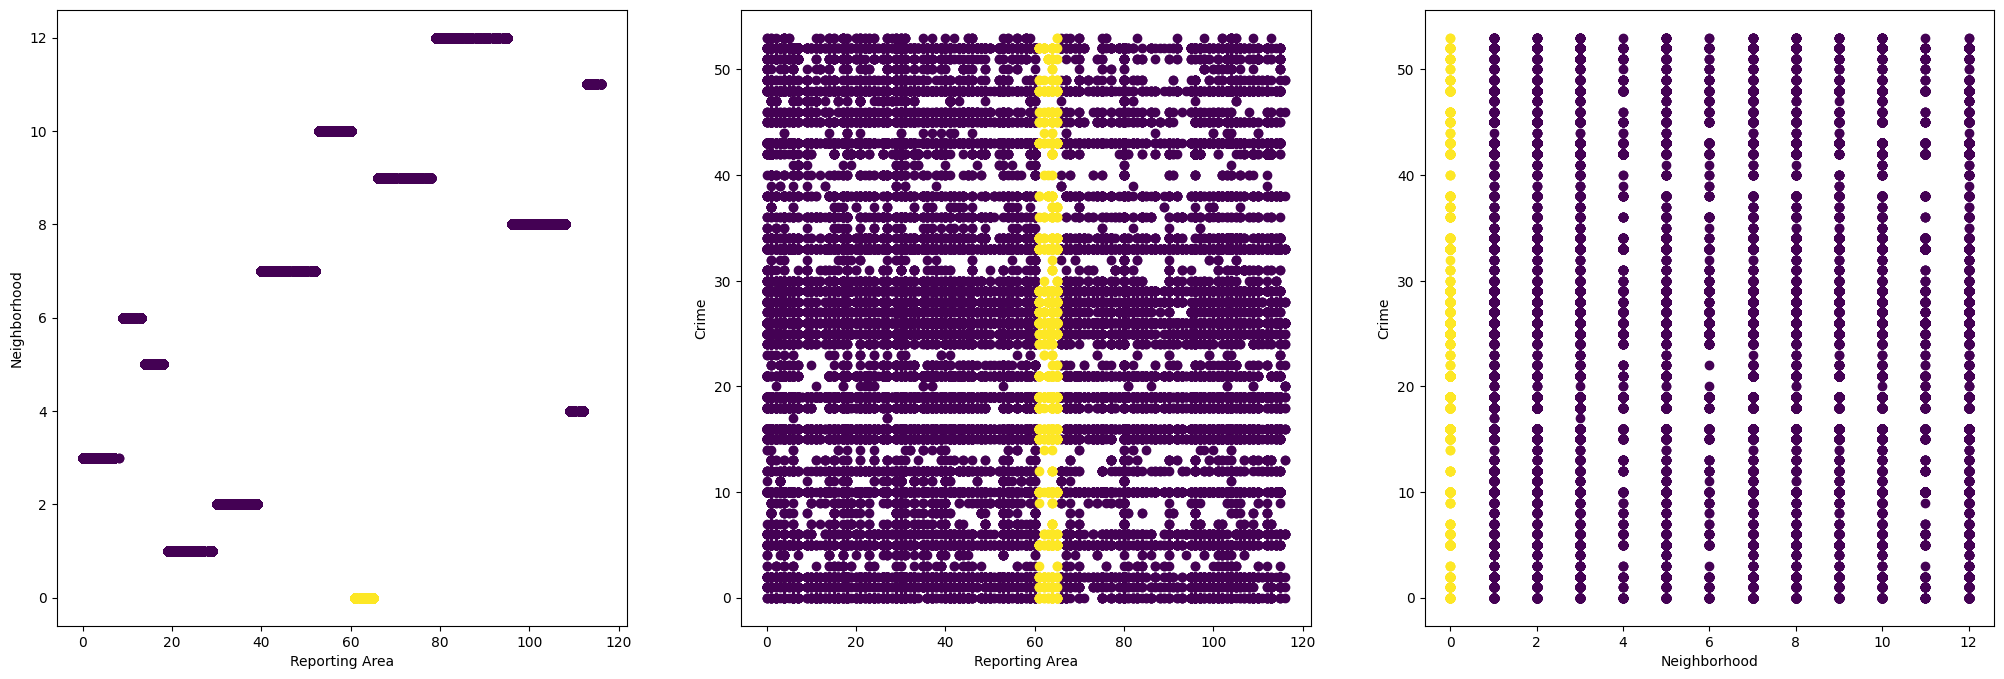

In [873]:
#use color map for each cluster
colors = cm.viridis(np.linspace(0, 1, n_clusters))

columns = ['Reporting Area', 'Neighborhood', 'Crime']
import math
plt.subplots(math.comb(len(columns), 2)//3,3, figsize=(25,8))
m = 1
#plot clusters for each column i and j of the data

for i in range(len(columns)-1):
    for k in range(i+1, len(columns)):
        plt.subplot(math.comb(len(columns), 2)//3,3, m)
        for j in range(n_clusters):
            plt.scatter(X.iloc[clusters == j, i], X.iloc[clusters ==j, k], c = colors[j])
            plt.xlabel(columns[i])
            plt.ylabel(columns[k])
        m = m + 1
plt.show()

### Evaluate the model performance

In [874]:
score = silhouette_score(X, clusters)
print(f'Silhouette Score: {score.round(3)}')

Silhouette Score: -0.124


# Conclusion

<p>We can conclude:</p>
<ul>
<li>the optimal number cluster is 2</li>
<li>the kmeans model give us better performance of clutering with 0.53 as silhoutte score</li>
<li>the hierachical model does not give a good performance, may be because of linkage used. However, using other linkage consume a lot of memory that a simple computer cannot handle</li>
</ul>